In [3]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [11]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test)=fashion_mnist.load_data()

X_valid,X_train, y_valid, y_train = train_test_split(X_train_full, y_train_full, shuffle=True, test_size=0.1)


X_valid, X_train=X_valid/255.0, X_train/255.0
X_test=X_test/255.0

X_train=X_train[...,np.newaxis]
X_valid=X_valid[...,np.newaxis]
X_test=X_test[...,np.newaxis]



In [4]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [13]:
# 1. 강의 자료
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(129,activation='relu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(64, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
204/204 [==============================] - 87s 425ms/step - loss: 1.9406 - accuracy: 0.2649 - val_loss: 0.8371 - val_accuracy: 0.7392
Epoch 2/10
204/204 [==============================] - 82s 403ms/step - loss: 1.0100 - accuracy: 0.6370 - val_loss: 0.6483 - val_accuracy: 0.7578
Epoch 3/10
204/204 [==============================] - 81s 397ms/step - loss: 0.7765 - accuracy: 0.7212 - val_loss: 0.5347 - val_accuracy: 0.7930
Epoch 4/10
204/204 [==============================] - 91s 449ms/step - loss: 0.6543 - accuracy: 0.7713 - val_loss: 0.4881 - val_accuracy: 0.8142
Epoch 5/10
204/204 [==============================] - 90s 444ms/step - loss: 0.5996 - accuracy: 0.7953 - val_loss: 0.4536 - val_accuracy: 0.8250
Epoch 6/10
204/204 [==============================] - 79s 391ms/step - loss: 0.5522 - accuracy: 0.8081 - val_loss: 0.4876 - val_accuracy: 0.8116
Epoch 7/10
204/204 [==============================] - 78s 385ms/step - loss: 0.4933 - accuracy: 0.8183 - val_loss: 0.4283 - val_ac

원본 파일을 돌려본 결과 정확도가 0.8519으로 나왔다.

강의 자료 그대로 순서를 섞지 않고 모델을 돌리면 0.89정도가 나옵니다. 그러나, 실제 모델을 돌릴 입장에서 shuffle을 True로 하는 것이 적합하다고 판단되어 train_test_split 라이브러리를 이용하여 랜덤으로 돌렸습니다.

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.   0.   0.   0.   0.97 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.   0.98 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


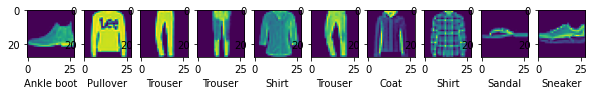

In [6]:
## 이미지 확인
X_new=X_test[:10]
y_prob=model.predict(X_new)
print(y_prob.round(2))
y_pred=np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

plt.figure(figsize=(10,10))
for img in range(10):
    plt.subplot(1,10,img+1)
    plt.grid(False)
    plt.imshow(X_new[img,:,:,0])
    plt.xlabel(class_names[y_pred[img]])

In [7]:
model.save("original_model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# 2.1. 활성화 함수 : swish
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='swish',padding='same',input_shape=[28,28,1]),
                              keras.layers.AveragePooling2D(2),
                               keras.layers.Conv2D(128,3,activation='swish', padding='same'),
                               keras.layers.Conv2D(128,3,activation='swish', padding='same'),
                               keras.layers.AveragePooling2D(2),
                               keras.layers.Conv2D(128,3,activation='swish', padding='same'),
                               keras.layers.Conv2D(128,3,activation='swish', padding='same'),
                               keras.layers.AveragePooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(129,activation='swish'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(64, activation='swish'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?


model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
207/207 [==============================] - 101s 486ms/step - loss: 1.7210 - accuracy: 0.3772 - val_loss: 0.7237 - val_accuracy: 0.7434
Epoch 2/10
207/207 [==============================] - 92s 445ms/step - loss: 0.8948 - accuracy: 0.6781 - val_loss: 0.5573 - val_accuracy: 0.7909
Epoch 3/10
207/207 [==============================] - 93s 452ms/step - loss: 0.6943 - accuracy: 0.7501 - val_loss: 0.4953 - val_accuracy: 0.8116
Epoch 4/10
207/207 [==============================] - 96s 463ms/step - loss: 0.5988 - accuracy: 0.7879 - val_loss: 0.4724 - val_accuracy: 0.8162
Epoch 5/10
207/207 [==============================] - 97s 470ms/step - loss: 0.5366 - accuracy: 0.8069 - val_loss: 0.4158 - val_accuracy: 0.8444
Epoch 6/10
207/207 [==============================] - 94s 455ms/step - loss: 0.4931 - accuracy: 0.8178 - val_loss: 0.4341 - val_accuracy: 0.8431
Epoch 7/10
207/207 [==============================] - 99s 478ms/step - loss: 0.4369 - accuracy: 0.8383 - val_loss: 0.4536 - val_a

기존의 활성화함수가 relu이므로, 비전에서 많이 사용된다고 하는 swish로 활성화 함수를 바꿔보았다. 
그 결과, 정확도는 0.8573이다.

In [18]:
model.save("swish_model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
# 2.2. 활성화 함수 : elu
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='elu',padding='same',input_shape=[28,28,1]),
                              keras.layers.AveragePooling2D(2),
                               keras.layers.Conv2D(128,3,activation='elu', padding='same'),
                               keras.layers.Conv2D(128,3,activation='elu', padding='same'),
                               keras.layers.AveragePooling2D(2),
                               keras.layers.Conv2D(128,3,activation='elu', padding='same'),
                               keras.layers.Conv2D(128,3,activation='elu', padding='same'),
                               keras.layers.AveragePooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(129,activation='elu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(64, activation='elu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?


model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
207/207 [==============================] - 89s 426ms/step - loss: 1.5214 - accuracy: 0.4533 - val_loss: 0.6874 - val_accuracy: 0.7408
Epoch 2/10
207/207 [==============================] - 87s 421ms/step - loss: 0.9353 - accuracy: 0.6609 - val_loss: 0.6159 - val_accuracy: 0.7635
Epoch 3/10
207/207 [==============================] - 90s 435ms/step - loss: 0.7840 - accuracy: 0.7242 - val_loss: 0.5764 - val_accuracy: 0.7870
Epoch 4/10
207/207 [==============================] - 87s 421ms/step - loss: 0.7390 - accuracy: 0.7320 - val_loss: 0.4973 - val_accuracy: 0.8151
Epoch 5/10
207/207 [==============================] - 91s 443ms/step - loss: 0.6284 - accuracy: 0.7743 - val_loss: 0.5067 - val_accuracy: 0.8143
Epoch 6/10
207/207 [==============================] - 108s 524ms/step - loss: 0.6046 - accuracy: 0.7831 - val_loss: 0.4477 - val_accuracy: 0.8356
Epoch 7/10
207/207 [==============================] - 87s 420ms/step - loss: 0.5421 - accuracy: 0.8101 - val_loss: 0.4867 - val_a

elu로도 활성화 함수를 바꿔보았다. 
그 결과, 정확도는 0.8472로 이전보다 떨어진 것을 볼 수 있다.

In [20]:
model.save("elu_model.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
# 3. 필터 늘림
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                                keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
222/222 [==============================] - 128s 575ms/step - loss: 1.5560 - accuracy: 0.4215 - val_loss: 0.6541 - val_accuracy: 0.7408
Epoch 2/10
222/222 [==============================] - 130s 585ms/step - loss: 0.6717 - accuracy: 0.7380 - val_loss: 0.4661 - val_accuracy: 0.8275
Epoch 3/10
222/222 [==============================] - 131s 592ms/step - loss: 0.5514 - accuracy: 0.8006 - val_loss: 0.4808 - val_accuracy: 0.8247
Epoch 4/10
222/222 [==============================] - 129s 584ms/step - loss: 0.4660 - accuracy: 0.8345 - val_loss: 0.4464 - val_accuracy: 0.8296
Epoch 5/10
222/222 [==============================] - 128s 580ms/step - loss: 0.4032 - accuracy: 0.8541 - val_loss: 0.3823 - val_accuracy: 0.8595
Epoch 6/10
222/222 [==============================] - 131s 590ms/step - loss: 0.3494 - accuracy: 0.8709 - val_loss: 0.3786 - val_accuracy: 0.8646
Epoch 7/10
222/222 [==============================] - 123s 556ms/step - loss: 0.3328 - accuracy: 0.8812 - val_loss: 0.3961 -

필터의 개수를 레이어 별로 두배 정도 늘려보았다. 
정확도는 0.8689으로 처음보다 높게 나왔다.

In [25]:
model.save("more_filter_model.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
# 4. 이미지 늘림

image_generator = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.1, 
    shear_range=0.5, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 100

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])




Epoch 1/10
207/207 [==============================] - 174s 840ms/step - loss: 1.7485 - accuracy: 0.3328 - val_loss: 0.6578 - val_accuracy: 0.7582
Epoch 2/10
207/207 [==============================] - 163s 791ms/step - loss: 0.7276 - accuracy: 0.7333 - val_loss: 0.5375 - val_accuracy: 0.8076
Epoch 3/10
207/207 [==============================] - 171s 827ms/step - loss: 0.5741 - accuracy: 0.7892 - val_loss: 0.4456 - val_accuracy: 0.8363
Epoch 4/10
207/207 [==============================] - 173s 839ms/step - loss: 0.4991 - accuracy: 0.8224 - val_loss: 0.4361 - val_accuracy: 0.8396
Epoch 5/10
207/207 [==============================] - 192s 932ms/step - loss: 0.4345 - accuracy: 0.8402 - val_loss: 0.4415 - val_accuracy: 0.8456
Epoch 6/10
207/207 [==============================] - 192s 931ms/step - loss: 0.3994 - accuracy: 0.8507 - val_loss: 0.4329 - val_accuracy: 0.8480
Epoch 7/10
207/207 [==============================] - 189s 914ms/step - loss: 0.3591 - accuracy: 0.8709 - val_loss: 0.4498 -

성능을 높이기 위해 앞에서 늘린 필터의 개수와 함께 이미지의 개수를 늘려보았다.
ImageDataGenerator를 사용하여 기울기, 확대, 각도, 좌우 이동 등의 변수를 설정해주었다.
이미지를 추가한 결과 성능은 0.8612으로 나왔다.

In [15]:
model.save("more_image_model.h5")
print("Saved model to disk")

Saved model to disk


[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.32 0.   0.03 0.   0.   0.   0.65 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.13 0.   0.87 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


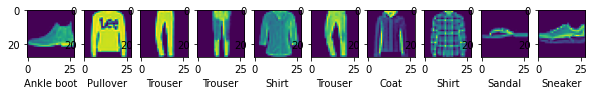

In [17]:
## 이미지 확인
X_new=X_test[:10]
y_prob=model.predict(X_new)
print(y_prob.round(2))
y_pred=np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

plt.figure(figsize=(10,10))
for img in range(10):
    plt.subplot(1,10,img+1)
    plt.grid(False)
    plt.imshow(X_new[img,:,:,0])
    plt.xlabel(class_names[y_pred[img]])

In [ ]:
# 5. 에포크 더 늘림

image_generator = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.10, 
    shear_range=0.5, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 100

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

이미지 및 필터를 추가한채로 에포크의 개수를 늘려보았다. 
dead kernel이 떠서 Google Colab에서 돌려본 결과 성능은 0.8653으로 나왔다.

In [ ]:
model.save("more_epoche_model.h5")
print("Saved model to disk")

In [8]:
# 6. 이미지 더 늘림

image_generator = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.10, 
    shear_range=0.5, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 1000

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                                keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.Conv2D(256,3,activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
241/241 [==============================] - 175s 726ms/step - loss: 1.6725 - accuracy: 0.3675 - val_loss: 0.6355 - val_accuracy: 0.7616
Epoch 2/10
241/241 [==============================] - 176s 731ms/step - loss: 0.7232 - accuracy: 0.7264 - val_loss: 0.4868 - val_accuracy: 0.8092
Epoch 3/10
241/241 [==============================] - 177s 736ms/step - loss: 0.5833 - accuracy: 0.7910 - val_loss: 0.4185 - val_accuracy: 0.8435
Epoch 4/10
241/241 [==============================] - 178s 739ms/step - loss: 0.4786 - accuracy: 0.8257 - val_loss: 0.4046 - val_accuracy: 0.8483
Epoch 5/10
241/241 [==============================] - 176s 730ms/step - loss: 0.4233 - accuracy: 0.8424 - val_loss: 0.4007 - val_accuracy: 0.8491
Epoch 6/10
241/241 [==============================] - 179s 746ms/step - loss: 0.3887 - accuracy: 0.8521 - val_loss: 0.4262 - val_accuracy: 0.8514
Epoch 7/10
241/241 [==============================] - 173s 721ms/step - loss: 0.3598 - accuracy: 0.8716 - val_loss: 0.3774 -

이미지의 추가 개수를 100개에서 1000개로 늘려보았다.
그 결과 성능은 0.8683으로 나왔다.

In [9]:
model.save("morenmore_image_model.h5")
print("Saved model to disk")

Saved model to disk


In [22]:
# 7. 커널 사이즈를 이차원으로!, strides=(2,2) 추가


image_generator = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.10, 
    shear_range=0.5, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 500

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',strides = (2,2),padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,(3,3),activation='relu', strides = (2,2),padding='same'),
                               keras.layers.Conv2D(256,(3,3),activation='relu', strides = (2,2),padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dropout(0.2),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.2),
                               keras.layers.Dense(10,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
222/222 [==============================] - 12s 52ms/step - loss: 1.3381 - accuracy: 0.4966 - val_loss: 0.6282 - val_accuracy: 0.7608
Epoch 2/10
222/222 [==============================] - 10s 45ms/step - loss: 0.6227 - accuracy: 0.7589 - val_loss: 0.4874 - val_accuracy: 0.8185
Epoch 3/10
222/222 [==============================] - 10s 45ms/step - loss: 0.5430 - accuracy: 0.7977 - val_loss: 0.4730 - val_accuracy: 0.8245
Epoch 4/10
222/222 [==============================] - 10s 46ms/step - loss: 0.4515 - accuracy: 0.8306 - val_loss: 0.4582 - val_accuracy: 0.8366
Epoch 5/10
222/222 [==============================] - 10s 47ms/step - loss: 0.3999 - accuracy: 0.8536 - val_loss: 0.3862 - val_accuracy: 0.8629
Epoch 6/10
222/222 [==============================] - 11s 47ms/step - loss: 0.3717 - accuracy: 0.8631 - val_loss: 0.4190 - val_accuracy: 0.8538
Epoch 7/10
222/222 [==============================] - 10s 46ms/step - loss: 0.3001 - accuracy: 0.8823 - val_loss: 0.3978 - val_accuracy:

커널의 사이즈를 이차원으로(3->(3,3)) 늘리고, strides를 추가해주었다. Stride는 필터를 순회하는 간격이다.

그 결과 성능은 0.8511으로 나왔다.

In [23]:
model.save("kernelnstride_model.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
# 8.  레이어 추가

image_generator = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.10, 
    shear_range=0.5, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 500

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)

model=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(128,(3,3),activation='relu', padding='same'),
                               keras.layers.Conv2D(256,(3,3),activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Conv2D(256,(3,3),activation='relu', padding='same'),
                               keras.layers.Conv2D(256,(3,3),activation='relu', padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),#완전연결층
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.5),
                               keras.layers.Dense(10,activation='softmax')])#10개 중 누가 제일 높은가?
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

Epoch 1/10
210/210 [==============================] - 154s 731ms/step - loss: 1.6384 - accuracy: 0.3801 - val_loss: 0.6449 - val_accuracy: 0.7679
Epoch 2/10
210/210 [==============================] - 161s 771ms/step - loss: 0.7007 - accuracy: 0.7430 - val_loss: 0.4936 - val_accuracy: 0.8228
Epoch 3/10
210/210 [==============================] - 166s 795ms/step - loss: 0.5104 - accuracy: 0.8202 - val_loss: 0.4307 - val_accuracy: 0.8462
Epoch 4/10
210/210 [==============================] - 166s 794ms/step - loss: 0.4556 - accuracy: 0.8380 - val_loss: 0.3745 - val_accuracy: 0.8636
Epoch 5/10
210/210 [==============================] - 169s 806ms/step - loss: 0.4128 - accuracy: 0.8554 - val_loss: 0.3681 - val_accuracy: 0.8676
Epoch 6/10
210/210 [==============================] - 183s 874ms/step - loss: 0.3550 - accuracy: 0.8739 - val_loss: 0.3378 - val_accuracy: 0.8751
Epoch 7/10
210/210 [==============================] - 182s 868ms/step - loss: 0.3002 - accuracy: 0.8869 - val_loss: 0.3427 -

이미지와 필터의 개수가 보강된 상태로 레이어를 늘려보았다.
그 결과 성능은 0.8678으로 나왔다.

In [29]:
model.save("more_layer_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# 9. 오버피팅 방지를 위하여 중간 중간에 dropout 추가
image_generator = ImageDataGenerator(
    rotation_range=10, 
    zoom_range=0.10, 
    shear_range=0.5, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    horizontal_flip=True,
    vertical_flip=False)

augment_size = 500

randidx = np.random.randint(X_train.shape[0], size=augment_size)
x_augmented = X_train[randidx].copy()
y_augmented = y_train[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다. 
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))



tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)


model=keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=[28,28,1]),
                              keras.layers.BatchNormalization(),
                               keras.layers.Conv2D(128,(3,3),activation='relu', padding='same'),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
                               keras.layers.BatchNormalization(),
                               keras.layers.Dropout(0.25),
                               keras.layers.Conv2D(256,(3,3),activation='relu', padding='same'),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
                               keras.layers.MaxPooling2D(2),
                               keras.layers.Dropout(0.25),
                               keras.layers.Flatten(),#일자로
                               keras.layers.Dense(512,activation='relu'),
                               keras.layers.Dropout(0.25),
                               keras.layers.Dense(256, activation='relu'),
                               keras.layers.Dropout(0.25),
                               keras.layers.Dense(10,activation='softmax')])


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

레이어가 추가되었으므로 오버피팅을 방지하고자 일정 부분(0.25) DropOut을 추가하였다.
이 또한 dead kernel이 떠서 Google Colab으로 돌려본 결과 성능은 0.8564으로 나왔다.

In [ ]:
model.save("dropout_model.h5")
print("Saved model to disk")

## 이 중 기존 모델의 성능인 0.8519에 비하여 가장 성능이 높게 나온 0.8683의  more_filter_model.h5의 이름을 model.h5로 바꾸어 제출한다.